# Лабораторная работа №3. Синтез БИХ-фильтров




## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

0.000000000000000046


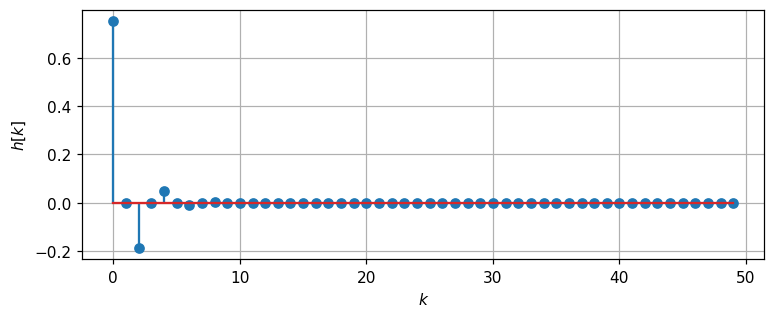

z =  [0. 0.]
p =  [-0.+0.5j  0.-0.5j]
k =  0.75


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


nu0 = 0.25
r = 0.5
G = (1 - r)*abs(1-r*np.exp(1j*4*np.pi*nu0))
alpha=np.array([1, 0, r**2])
beta=np.array([G, 0, 0])
N=50
x=np.zeros(N)
x[0]=1
y=signal.lfilter(b=beta, a=alpha, x=x)
# print(y)

# signal.unit_impulse(N)

k=np.arange(N)
h=G*(r**k)*np.sin((k+1)*np.pi/2)
# print(h)

print("%.18f" % max(abs(h-y)))

plt.figure(figsize=[8, 3], dpi=110)
plt.stem(k, h, use_line_collection=True)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.grid()
plt.show()

z, p, k = signal.tf2zpk(b=beta, a=alpha)
print("z = ", z)
print("p = ", p)
print("k = ", k)

system=signal.dlti(z, p, k, dt=1)

0.0000000000000001


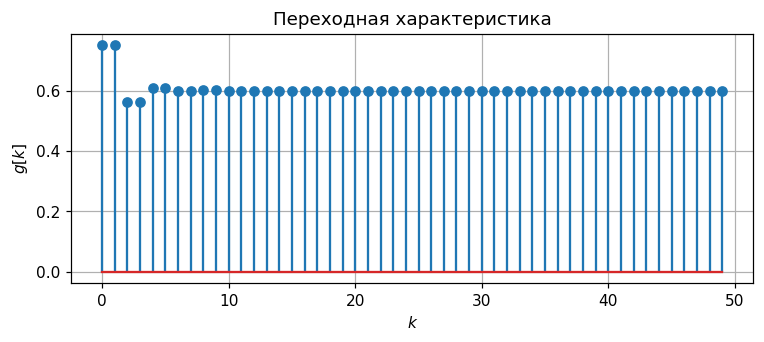

In [91]:
kg=np.arange(N)
y1=G*((((0.5j)**(kg+2))*(-0.5+1j+(-0.5-1j)*(-1)**(kg)))+1)/1.25

t, y2 = signal.dstep(system, n=N)

print("%.16f" % max(abs(y1-np.squeeze(y2))))

plt.figure(figsize=[8, 3], dpi=110)
plt.stem(t, np.squeeze(y2), use_line_collection=True)
plt.xlabel("$k$")
plt.ylabel("$g[k]$")
plt.title("Переходная характеристика")
plt.grid()
plt.show()

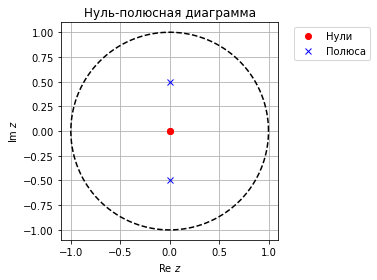

z =  [0. 0.]
p =  [-0.+0.5j  0.-0.5j]
k =  0.75
(array([0.75, 0.  , 0.  ]), array([1.  , 0.  , 0.25]))


In [92]:
q = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(q), np.sin(q), 'k--')  

plt.plot(z.real, z.imag, 'ro', label='Нули')
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re $z$")
plt.ylabel("Im $z$")
plt.show()

print("z = ", z)
print("p = ", p)
print("k = ", k)
print(signal.zpk2tf(z, p, k))

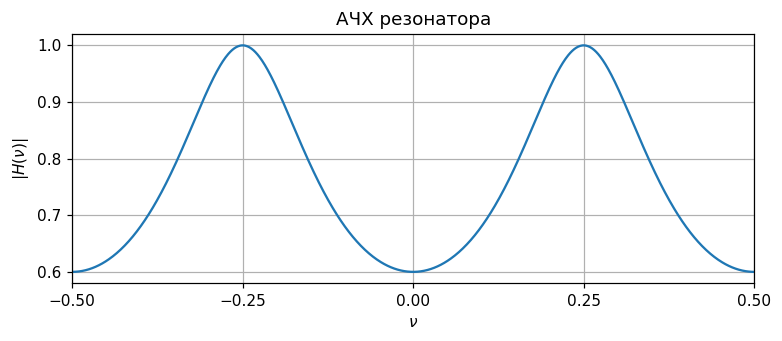

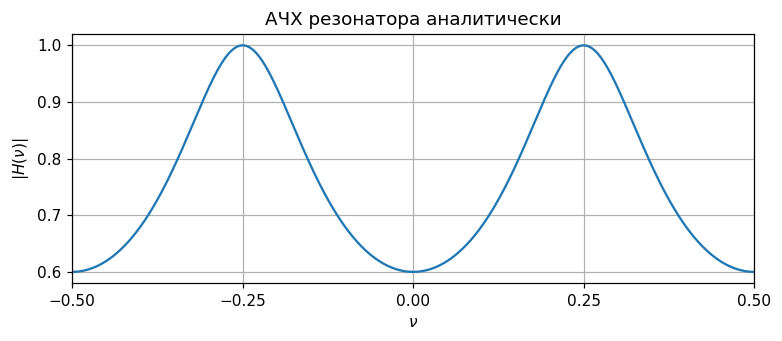

In [93]:
# print(signal.TransferFunction(system))

w, H = signal.dfreqresp(system, w=np.linspace(-np.pi, np.pi, 1024))

plt.figure(figsize=[8, 3], dpi=110)
plt.plot(w/(2*np.pi), abs(H))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ резонатора")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 5))
plt.grid()
plt.show()

nu=np.linspace(-0.5, 0.5, 1024)
zz=np.exp(1j*2*np.pi*nu)
HH=(G*zz**2)/(zz**2 + 0.25)

plt.figure(figsize=[8, 3], dpi=110)
plt.plot(nu, abs(HH))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ резонатора аналитически")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 5))
plt.grid()
plt.show()

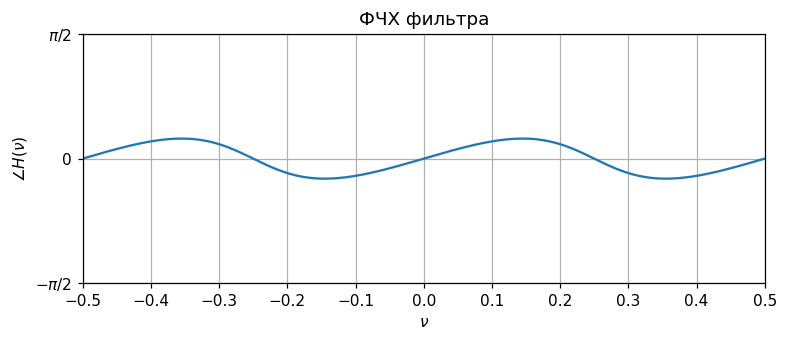

In [94]:
theta=np.linspace(-np.pi, np.pi, 1024)
theta, Hf =signal.dfreqresp(system, w=theta)

plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta/(2*np.pi), np.angle(Hf))
plt.xlabel("$\\nu$")
plt.ylabel("$\\angle H(\\nu)$")
plt.title("ФЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

plt.grid()
plt.show()

### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


[ 7.26360390e-01 -8.89534926e-17  7.26360390e-01]
[ 1.00000000e+00 -8.57252759e-17  4.90000000e-01]


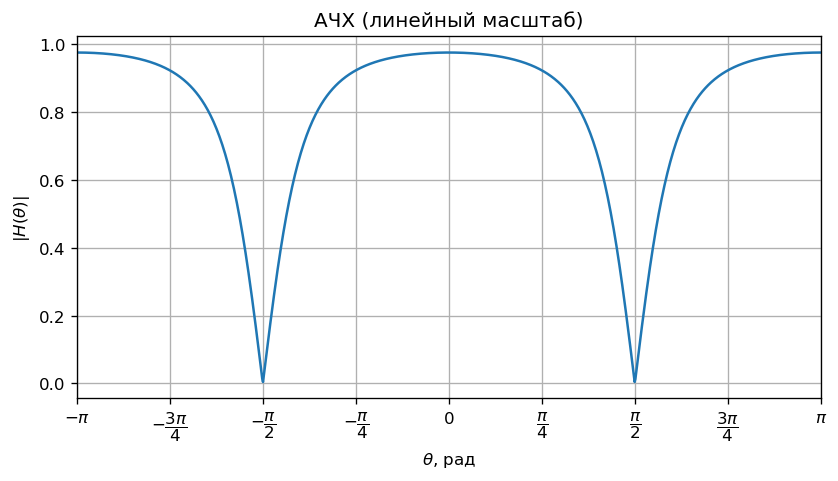

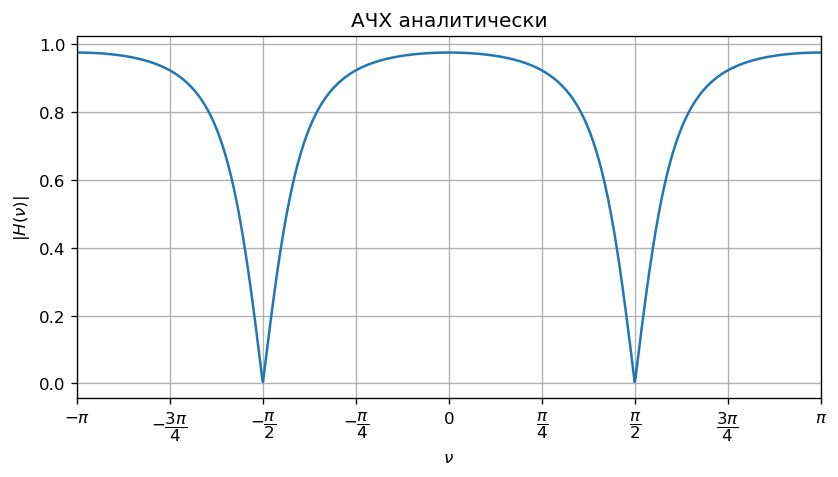

In [95]:
f0 = 250
fd = 1000
theta_0=2*np.pi*f0/fd
A=0.7
G = 1/abs(((1-np.exp(1j*3*np.pi/4))*(1-np.exp(-1j*3*np.pi/4)))/((1-A*np.exp(1j*3*np.pi/4))*(1-A*np.exp(-1j*3*np.pi/4))))

z=np.array([np.exp(1j*theta_0), np.exp(-1j*theta_0)])
p=np.array([A*np.exp(1j*theta_0), A*np.exp(-1j*theta_0)])
k=G

Hum_removal=signal.dlti(z,p,k, dt=1)
bb, aa = signal.zpk2tf(z, p, k)
print(bb)
print(aa)
w, H = signal.dfreqresp(Hum_removal, w=2*np.pi*np.linspace(-0.5, 0.5, 1024))

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(w, abs(H))
plt.xlabel("$\\theta$, рад")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])

str1=["$-\\pi$",
     "$-\dfrac{3\\pi}{4}$",
     "$-\dfrac{\\pi}{2}$",
     "$-\dfrac{\\pi}{4}$",
     "$0$",
     "$\dfrac{\\pi}{4}$",
     "$\dfrac{\\pi}{2}$",
     "$\dfrac{3\\pi}{4}$",
     "$\\pi$"]
plt.xticks(2*np.pi*np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()

nu=np.linspace(-0.5, 0.5, 1024)
zz=np.exp(1j*2*np.pi*nu)
HH=G*(1-(np.exp(1j*theta_0))*(zz**(-1)))*(1-(np.exp(-1j*theta_0))*(zz**(-1)))/((1-A*(np.exp(1j*theta_0))*(zz**(-1)))*(1-A*(np.exp(-1j*theta_0))*(zz**(-1))))

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(2*np.pi*nu, abs(HH))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ аналитически")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])
str1=["$-\\pi$",
     "$-\dfrac{3\\pi}{4}$",
     "$-\dfrac{\\pi}{2}$",
     "$-\dfrac{\\pi}{4}$",
     "$0$",
     "$\dfrac{\\pi}{4}$",
     "$\dfrac{\\pi}{2}$",
     "$\dfrac{3\\pi}{4}$",
     "$\\pi$"]
plt.xticks(2*np.pi*np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()
plt.show()

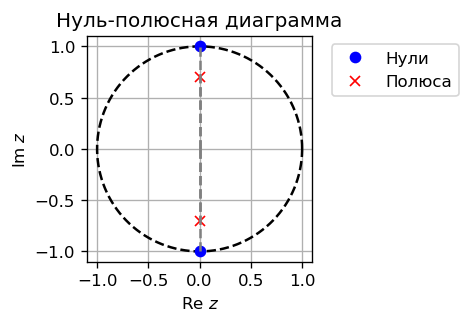

In [96]:
plt.figure(figsize=[4, 4], dpi=120)
# unit circle
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(z.real, z.imag, 'bo', label='Нули')
plt.plot(p.real, p.imag, 'rx', label='Полюса')

for u in z:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in p:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")

plt.xlabel("Re $z$")
plt.ylabel("Im $z$")

plt.tight_layout()

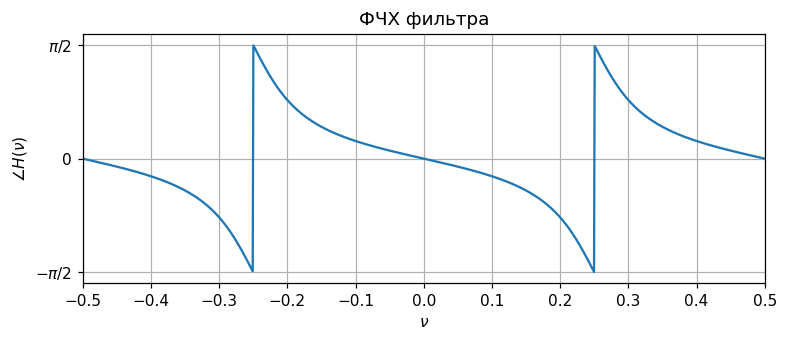

In [97]:
theta=np.linspace(-np.pi, np.pi, 1024)
theta, Hf =signal.dfreqresp(Hum_removal, w=theta)

plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta/(2*np.pi), np.angle(Hf))
plt.xlabel("$\\nu$")
plt.ylabel("$\\angle H(\\nu)$")
plt.title("ФЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

plt.grid()
plt.show()

## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |
|  $a_\max$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_\min$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_\max$,
* минимальное допустимое затухание в полосе задерживания $a_\min$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


Баттерворта: N = 16


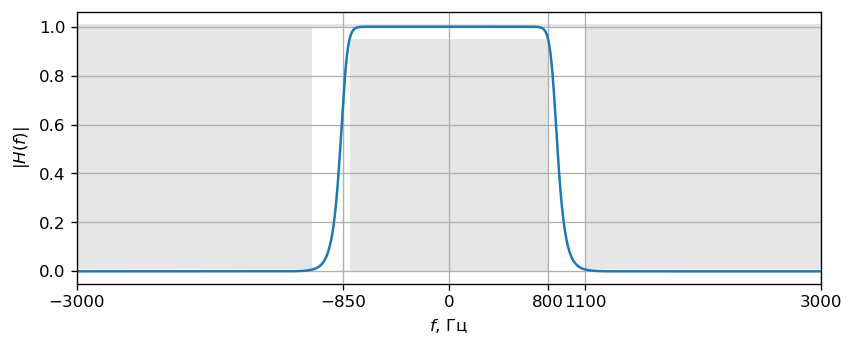

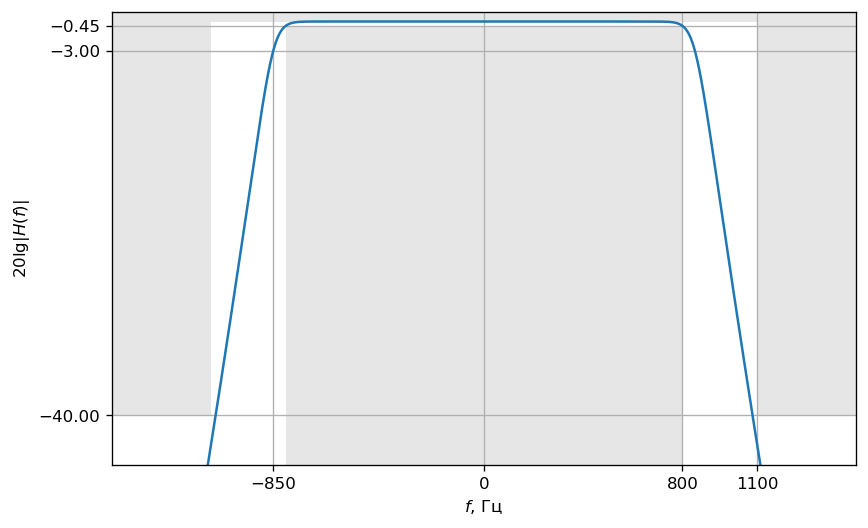

In [98]:
fs = 6000
wp = 800
ws = 1100
gpass = 0.4455
gstop = 40
d1 = 0.05
d2 = 0.01

# Баттерворта

N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
print("Баттерворта: N =", N) 

f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [0, 1-d1, 1-d1, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [1, 1.01, 1.01, 1], '0.9', lw=0)

plt.grid()

plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])

plt.yticks([-gstop, -3, -gpass])

plt.xlim([-1500, 1500])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [-2*gstop, -gpass, -gpass, -2*gstop], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [0, 1, 1, 0], '0.9', lw=0)
plt.grid()

Чебышёва 1: N = 7


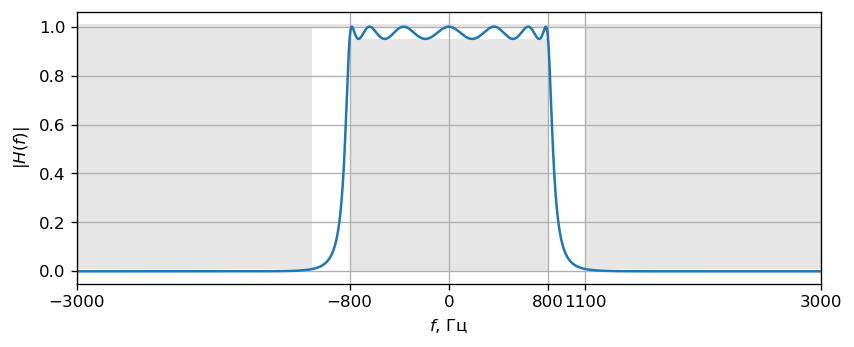

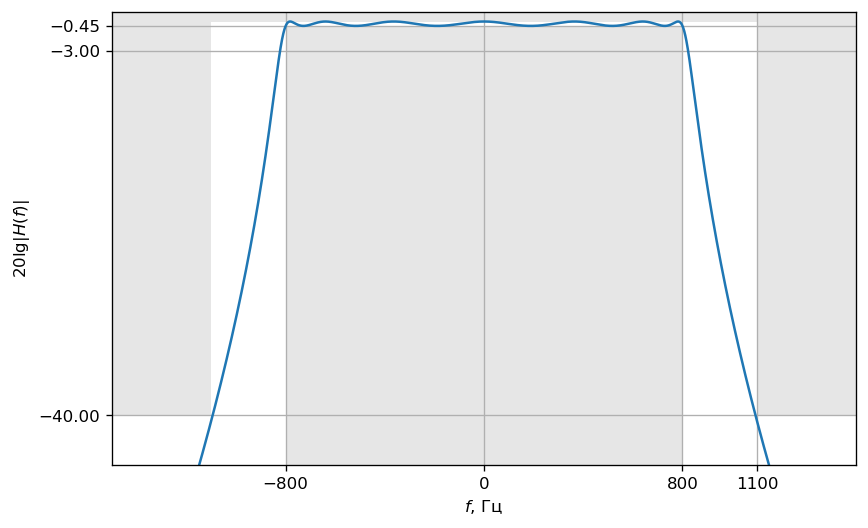

In [99]:
# Чебышёва 1

N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
print("Чебышёва 1: N =", N)

plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 1-d1, 1-d1, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [1, 1.01, 1.01, 1], '0.9', lw=0)

plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-1500, 1500])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [-2*gstop, -gpass, -gpass, -2*gstop], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [0, 1, 1, 0], '0.9', lw=0)
plt.grid()

Чебышёва 2: N = 7


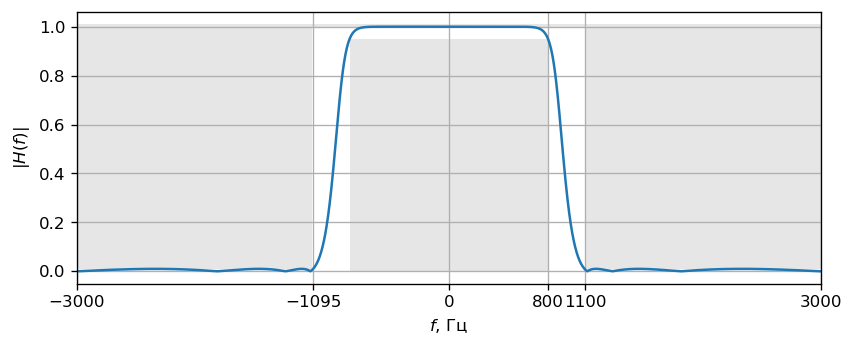

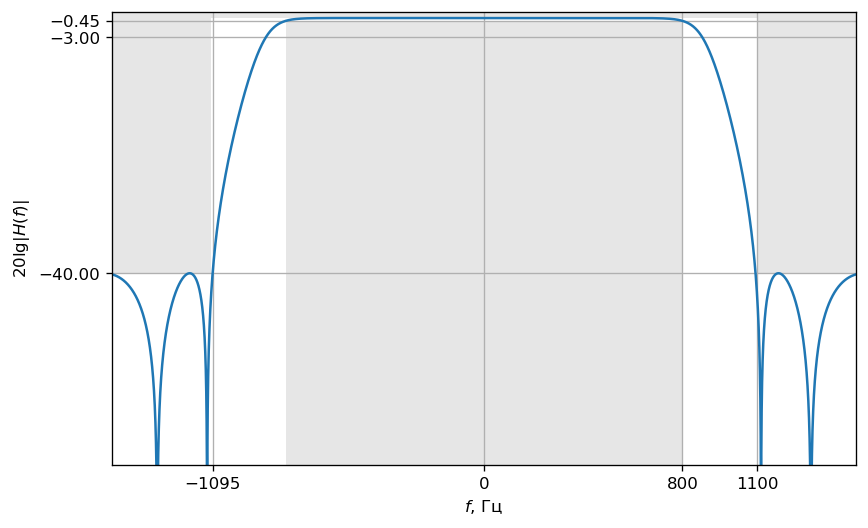

In [100]:
# Чебышёва 2

N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
print("Чебышёва 2: N =", N)

plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 1-d1, 1-d1, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [1, 1.01, 1.01, 1], '0.9', lw=0)

plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-1500, 1500])
plt.ylim([-70, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [-2*gstop, -gpass, -gpass, -2*gstop], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [0, 1, 1, 0], '0.9', lw=0)
plt.grid()

Золотарёва—Кауэра: N = 5
[ 0.02484758 -0.00749747  0.0253482   0.0253482  -0.00749747  0.02484758]
[ 1.         -3.16146297  4.74217079 -3.94523587  1.81859737 -0.36867272]

 [[ 0.02484758  0.02484758  0.          1.         -0.6453319   0.        ]
 [ 1.         -0.33189444  1.          1.         -1.2609773   0.63254003]
 [ 1.         -0.96984403  1.          1.         -1.25515377  0.90317071]]


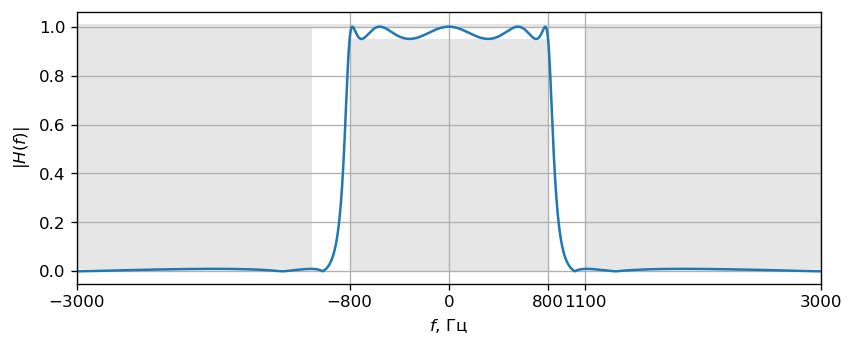

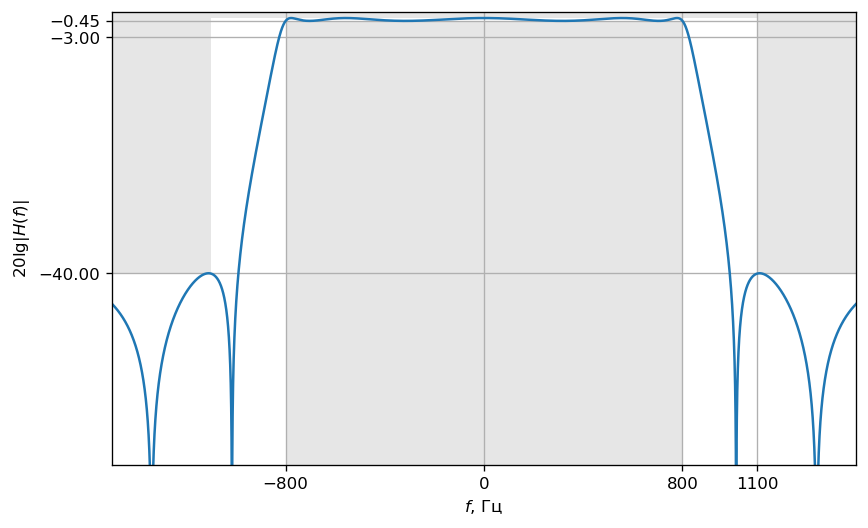

In [101]:
# Золотарёва—Кауэра

N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
print("Золотарёва—Кауэра: N =", N)
print(beta)
print(alpha)
ff = signal.tf2sos(beta, alpha)
print("\n", ff)

plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 1-d1, 1-d1, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [d2, 1, 1, d2], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [1, 1.01, 1.01, 1], '0.9', lw=0)

plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-1500, 1500])
plt.ylim([-70, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [-2*gstop, -gpass, -gpass, -2*gstop], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [-gstop, 0, 0, -gstop], '0.9', lw=0)
plt.fill([-fs,-fs, fs, fs], [0, 1, 1, 0], '0.9', lw=0)
plt.grid()

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

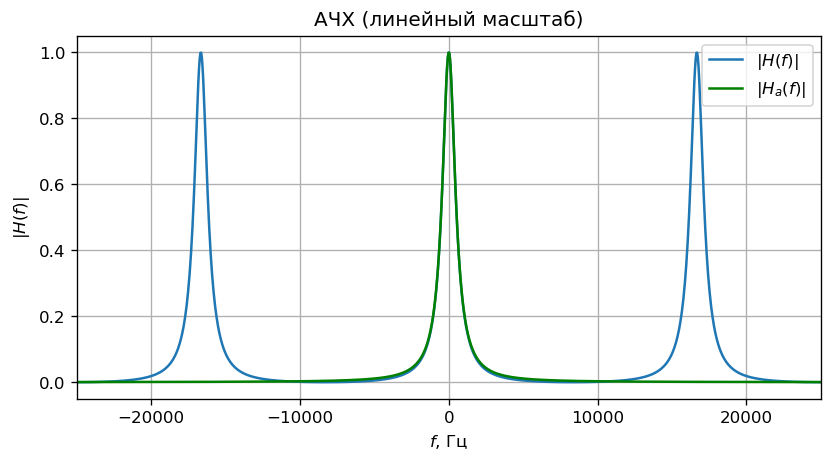

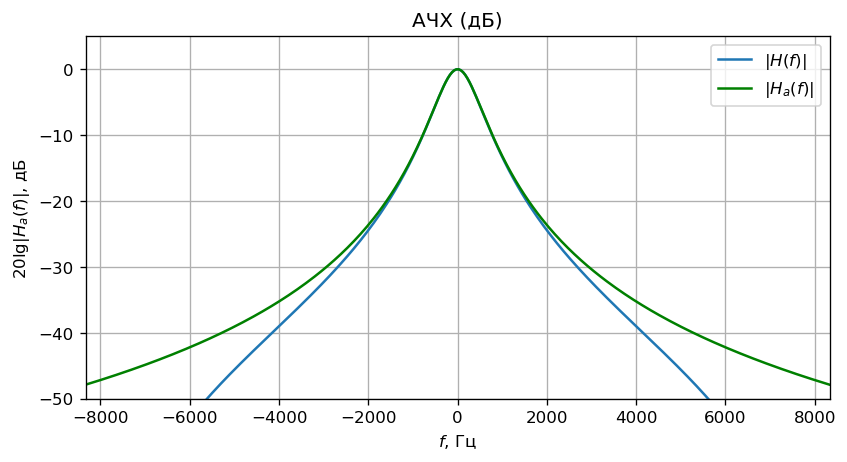

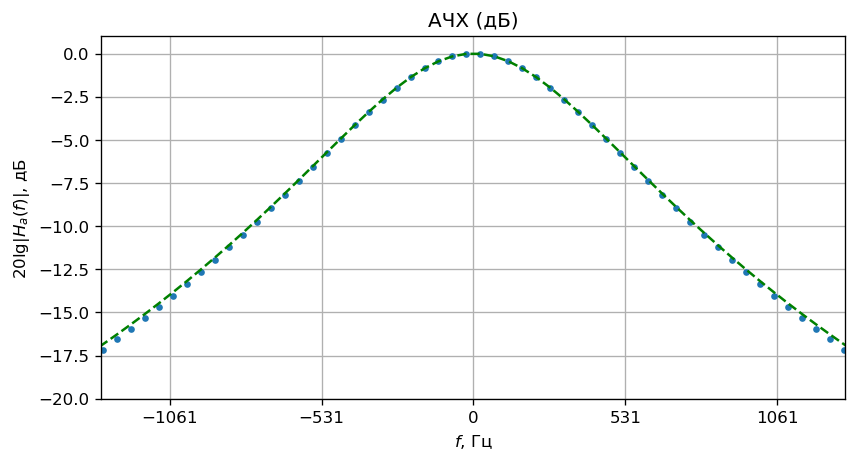

In [118]:
RC=3*1e-4
dt=RC/5
aa = RC/dt
lti_RC=signal.lti([1], [RC**2, 2*RC, 1])

beta=[1, 2, 1]
alpha=[(4*(aa**2)+4*aa+1), (2-8*(aa**2)), (4*(aa**2)-4*aa+1)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)

w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)+1e-6)

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.ylim([-50, 5])
plt.legend(loc='upper right')
plt.grid()

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), '.')
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g--")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.xlim([-1300, 1300])
plt.ylim([-20, 1])
plt.grid()

## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

In [120]:
%matplotlib notebook
%matplotlib inline

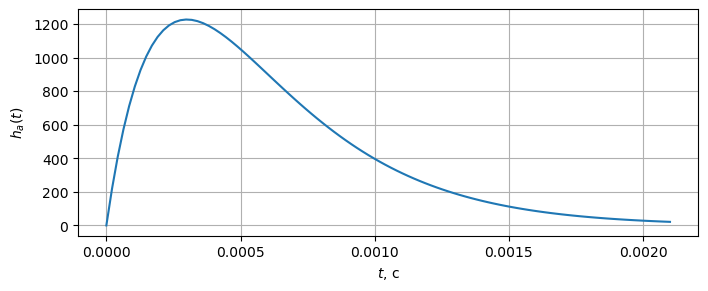

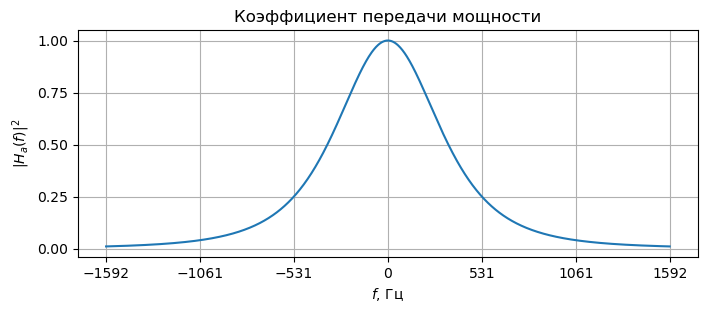

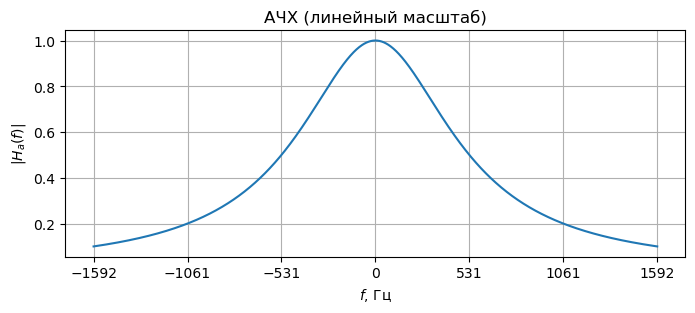

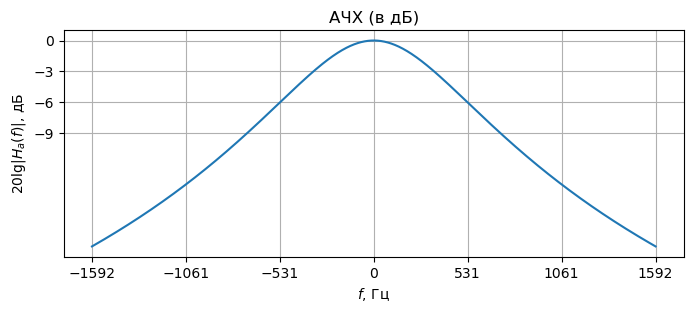

In [121]:
RC=3*1e-4
lti_RC=signal.lti([1], [RC**2, 2*RC, 1])

t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

w, H_a=signal.freqresp(lti_RC, w=np.linspace(-2*np.pi*3/(2*np.pi*RC), 2*np.pi*3/(2*np.pi*RC), 1024))

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a)**2)
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|^2$")
plt.title("Коэффициент передачи мощности")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(0, 1, 5))
plt.grid()

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a))
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.grid()

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), 20*np.log10(abs(H_a)))
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (в дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(-9, 0, 4))
plt.grid()

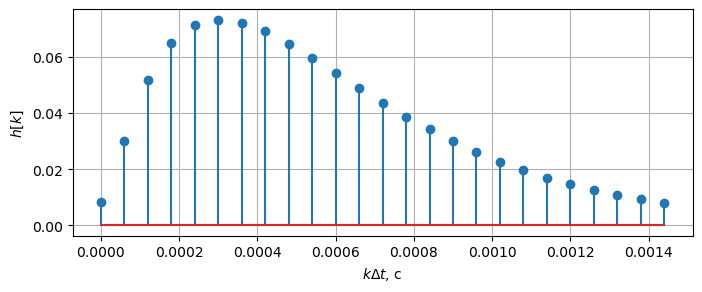

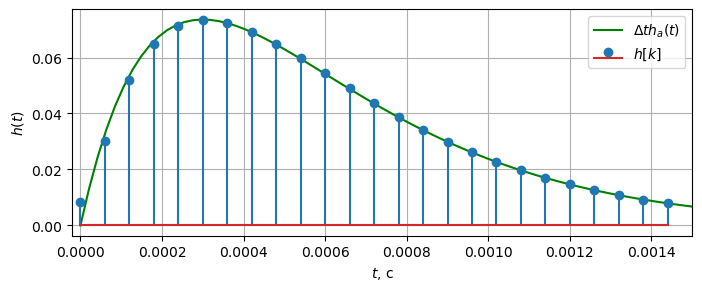

In [122]:
dt=RC/5
aa = RC/dt
beta=[1, 2, 1]
alpha=[(4*(aa**2)+4*aa+1), (2-8*(aa**2)), (4*(aa**2)-4*aa+1)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)

plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h), use_line_collection=True)
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()

plt.figure(figsize=[8, 3], dpi=100)
t, h_a = signal.impulse(lti_RC)
plt.plot(t, dt*h_a, 'g', label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h), use_line_collection=True, label="$h[k]$")

plt.legend()
plt.xlim([-0.00002, 0.0015])
plt.xlabel("$t$, c")
plt.ylabel("$h(t)$")
plt.grid()

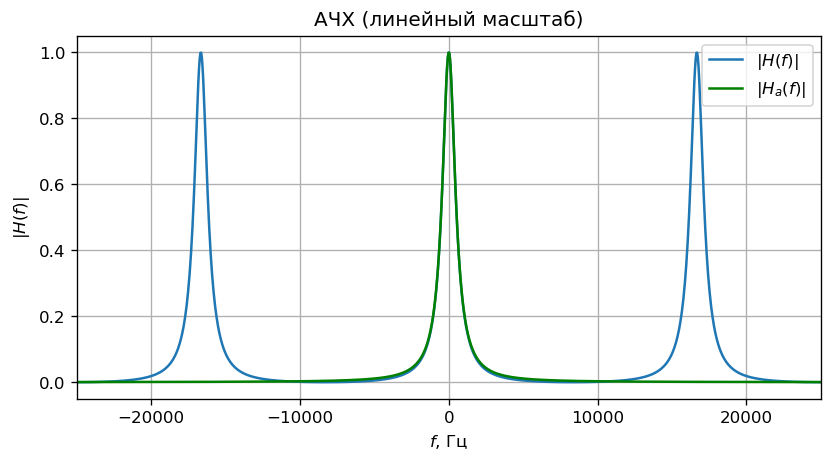

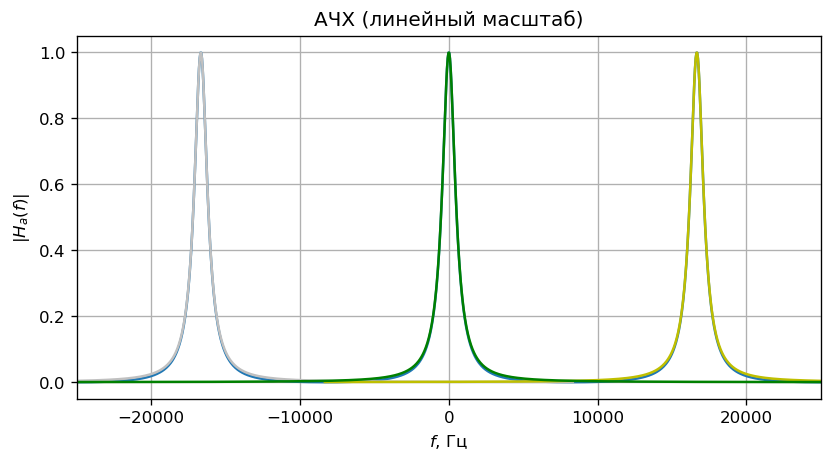

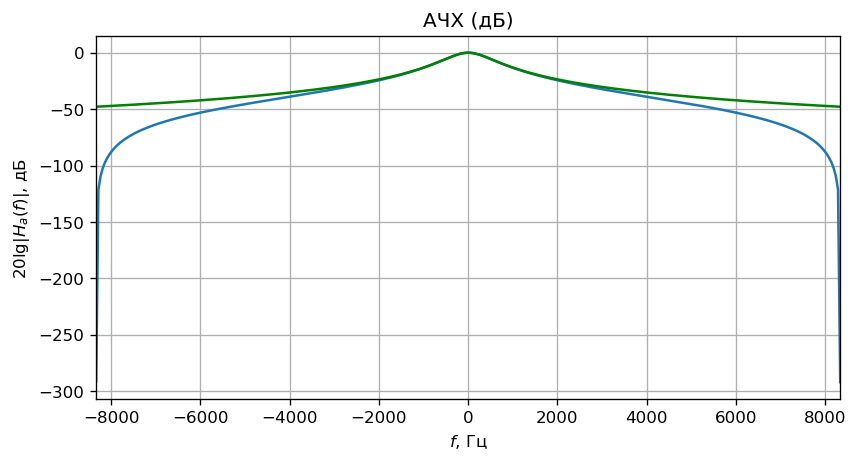

In [123]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)+1e-6)

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d))
plt.plot(w_a/(2*np.pi)-(1/dt), abs(H_a), "silver")
plt.plot(w_a/(2*np.pi)+(1/dt), abs(H_a), "y")
plt.plot(w_a/(2*np.pi), abs(H_a), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.grid()

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)))
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.grid()

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

In [79]:
import scipy.io.wavfile
from IPython.display import Audio

# afopen = './full-song.wav'
# afopen = './song-1-30.wav'
# afopen = './song-0-30.wav'
# afopen = './chorus-1.wav'
# afopen = './chorus-2-bass-solo.wav'
# afopen = './bass-begin.wav'
# afopen = './back-song.wav'
# afopen = './bass-solo.wav'
afopen = './breathing.wav'

# affin = './full-song-f.wav'
# affin = './song-1-30-f.wav'
# affin = './song-0-30-f.wav'
# affin = './chorus-1-f.wav'
# affin = './chorus-2-bass-solo-f.wav'
# affin = './bass-begin-f.wav'
# affin = './back-song-f.wav'
# affin = './bass-solo-f.wav'
affin = './breathing-f.wav'

fs, x=scipy.io.wavfile.read(afopen)
print(x.shape)
x1 = x[:, 0]
# x1 = x[:, 1]
print(x1.shape)

X=scipy.fft.fftshift(scipy.fft.fft(x1))
nu=-0.5+np.linspace(0, 1, num=x1.size, endpoint=False)

print(fs)
print(x1.shape[0]/fs)
print(abs(X).shape)
print((nu*fs).shape)
Audio(afopen)

(643439, 2)
(643439,)
44100
14.59045351473923
(643439,)
(643439,)


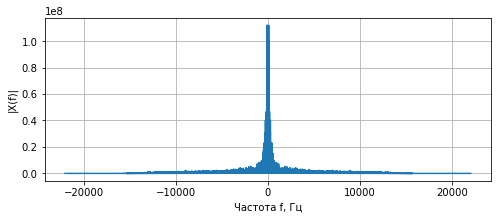

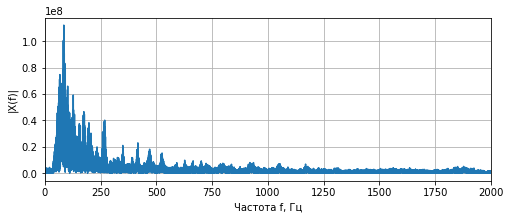

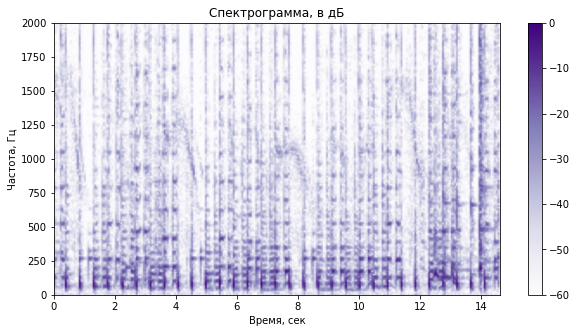

In [80]:
plt.figure(figsize=[8, 3])
plt.plot(nu*fs, abs(X))
#plt.xlim([0, 2000])
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|")
plt.grid()
plt.show()

plt.figure(figsize=[8, 3])
plt.plot(nu*fs, abs(X))
plt.xlim([0, 2000])
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|")
plt.grid()
plt.show()

plt.figure(figsize=[10, 5])
f, t, Zxx = signal.stft(x1, fs, nperseg=5000, window='blackman')
max_Zxx=np.max(np.abs(Zxx))
plt.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)/max_Zxx), shading='gouraud', cmap='Purples', vmin=-60)
plt.colorbar()
plt.ylim((0, 2000))
plt.title("Спектрограмма, в дБ")
plt.ylabel('Частота, Гц')
plt.xlabel('Время, сек')
plt.show()

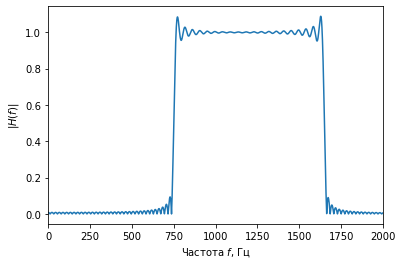

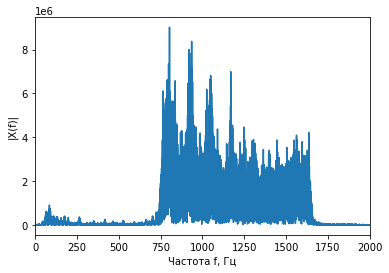

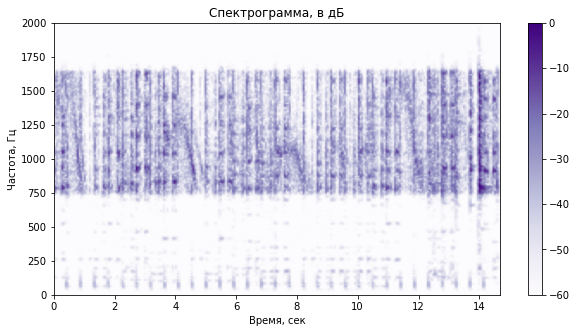

In [86]:
def h_0_shifted(k, nu_c):
    if (k-N)!=0:
        return np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c

def h_bp_shifted(k, nu_0, nu_c, N):
    if (k-N)!=0:
        return 2*np.cos(2*np.pi*nu_0*(k-N))*np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c*2*np.cos(2*np.pi*nu_0*(k-N))

fbass = 450

fbreath = 1200
dfbr = 450

fmain = 650
dfmain = 200

fback = 650
dfb = 150

N=1000
nu_c=fbass/fs
nu_d = dfbr/fs
nu_0 = fbreath/fs
k = np.arange(0, 2*N+1, 1)
h = np.array([h_bp_shifted(x, nu_0, nu_d, N) for x in k])
# h = np.array([h_0_shifted(x, nu_c=nu_c) for x in k])

H=scipy.fft.fftshift(scipy.fft.fft(h, 2**17))
nu=-0.5+np.linspace(0, 1, num=H.size)
plt.plot(nu*fs, abs(H))
plt.xlim([0, 2000])
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|H(f)|$");
plt.show()

y=signal.convolve(x1, h)
y=np.array(y, dtype=np.int16)

Y=scipy.fft.fftshift(scipy.fft.fft(y))
nu=-0.5+np.linspace(0, 1, num=y.size)
plt.plot(nu*fs, abs(Y))
plt.xlim([0, 2000])
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|");
plt.show()

scipy.io.wavfile.write(filename=affin, rate=fs, data=y)

plt.figure(figsize=[10, 5])
f, t, Zxx = signal.stft(y, fs, nperseg=5000, window='blackman')
max_Zxx=np.max(np.abs(Zxx))
plt.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)/max_Zxx), shading='gouraud', cmap='Purples', vmin=-60)
plt.colorbar()
plt.ylim((0, 2000))
plt.title("Спектрограмма, в дБ")
plt.ylabel('Частота, Гц')
plt.xlabel('Время, сек')
plt.show()

Audio(affin)